In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

# From Scratch

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

<Axes: xlabel='X1', ylabel='X2'>

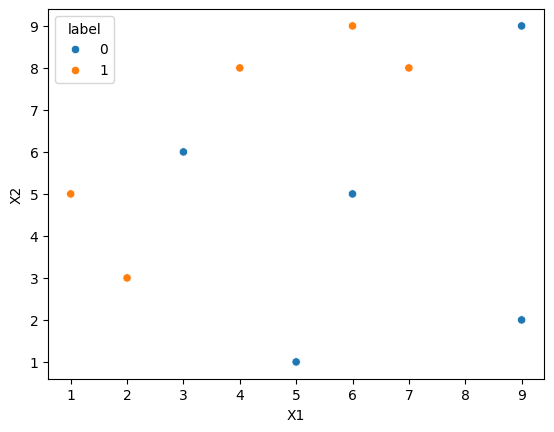

In [4]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [5]:
#initial weights
df['weights'] = 1/df.shape[0]

In [6]:
df.head()

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1


In [7]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1) #decision stump

In [8]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [9]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

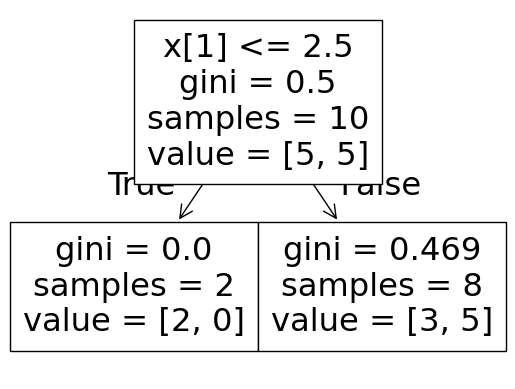

In [10]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

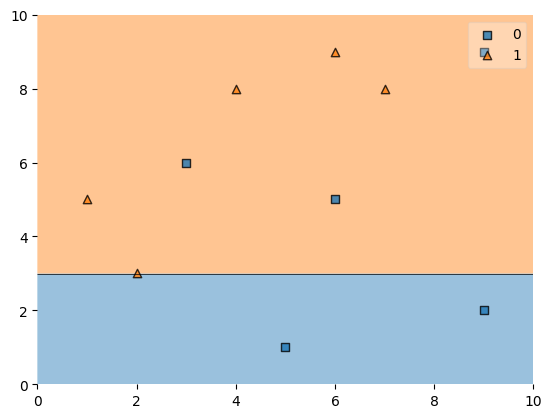

In [11]:
plot_decision_regions(X, y, clf=dt1)

In [12]:
df['y_pred'] = dt1.predict(X)

In [13]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [14]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [15]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3) # for the above data the sum of misclassifies is 0.3
alpha1

np.float64(0.42364893019360184)

In [16]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [17]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [18]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [19]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [20]:
#not 1 , has to me normalised
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [21]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [22]:
df['nomalized_weights'].sum()

np.float64(1.0)

In [23]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [24]:
df.iterrows

<bound method DataFrame.iterrows of    X1  X2  label  weights  y_pred  updated_weights  nomalized_weights  \
0   1   5      1      0.1       1         0.065508           0.071475   
1   2   3      1      0.1       1         0.065508           0.071475   
2   3   6      0      0.1       1         0.152653           0.166559   
3   4   8      1      0.1       1         0.065508           0.071475   
4   5   1      0      0.1       0         0.065508           0.071475   
5   6   9      1      0.1       1         0.065508           0.071475   
6   6   5      0      0.1       1         0.152653           0.166559   
7   7   8      1      0.1       1         0.065508           0.071475   
8   9   9      0      0.1       1         0.152653           0.166559   
9   9   2      0      0.1       0         0.065508           0.071475   

   cumsum_upper  cumsum_lower  
0      0.071475      0.000000  
1      0.142950      0.071475  
2      0.309508      0.142950  
3      0.380983      0.309508  


In [25]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [26]:
index_values = create_new_dataset(df)

index_values

[7, 6, 6, 2, 8, 4, 6, 9, 8, 2]

In [27]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [28]:
second_df

,X1,X2,label,weights
7,7,8,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
4,5,1,0,0.1
6,6,5,0,0.1
9,9,2,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1


In [29]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [30]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [31]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.625, 0.5, '  False')]

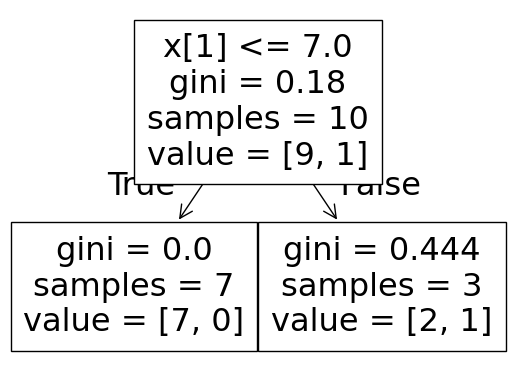

In [32]:
plot_tree(dt2)

<Axes: >

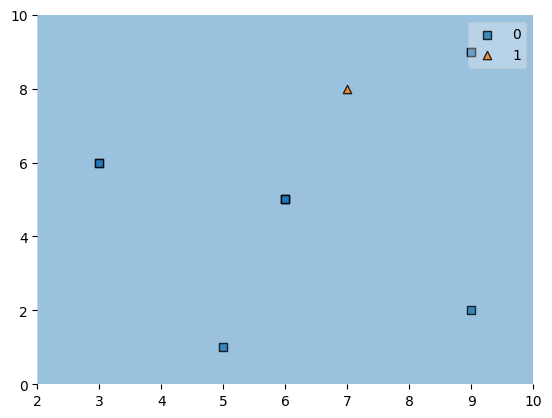

In [33]:
plot_decision_regions(X, y, clf=dt2)

In [34]:
second_df['y_pred'] = dt2.predict(X)

In [35]:
second_df

,X1,X2,label,weights,y_pred
7,7,8,1,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
8,9,9,0,0.1,0
4,5,1,0,0.1,0
6,6,5,0,0.1,0
9,9,2,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0


In [36]:
alpha2 = calculate_model_weight(0.1)
alpha2

np.float64(1.0986122886681098)

In [37]:
second_df['updated_weights'] = second_df.apply(
    lambda row: update_row_weights(row, alpha=1.0986),
    axis=1
)

In [38]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
7,7,8,1,0.1,0,0.299996
6,6,5,0,0.1,0,0.033334
6,6,5,0,0.1,0,0.033334
2,3,6,0,0.1,0,0.033334
8,9,9,0,0.1,0,0.033334
4,5,1,0,0.1,0,0.033334
6,6,5,0,0.1,0,0.033334
9,9,2,0,0.1,0,0.033334
8,9,9,0,0.1,0,0.033334
2,3,6,0,0.1,0,0.033334


In [39]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [40]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [41]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [42]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
7,7,8,1,0.1,0,0.299996,0.499994,0.499994,0.000000
6,6,5,0,0.1,0,0.033334,0.055556,0.555550,0.499994
6,6,5,0,0.1,0,0.033334,0.055556,0.611106,0.555550
2,3,6,0,0.1,0,0.033334,0.055556,0.666663,0.611106
8,9,9,0,0.1,0,0.033334,0.055556,0.722219,0.666663
4,5,1,0,0.1,0,0.033334,0.055556,0.777775,0.722219
6,6,5,0,0.1,0,0.033334,0.055556,0.833331,0.777775
9,9,2,0,0.1,0,0.033334,0.055556,0.888888,0.833331
8,9,9,0,0.1,0,0.033334,0.055556,0.944444,0.888888
2,3,6,0,0.1,0,0.033334,0.055556,1.000000,0.944444


In [43]:
index_values = create_new_dataset(second_df)

In [44]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [45]:
third_df

,X1,X2,label,weights
9,9,2,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
9,9,2,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1


In [46]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.625, 0.5, '  False')]

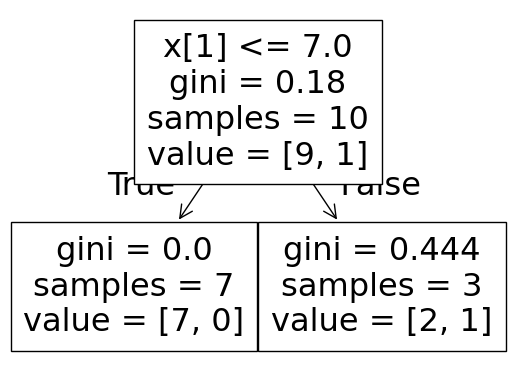

In [47]:
plot_tree(dt3)

<Axes: >

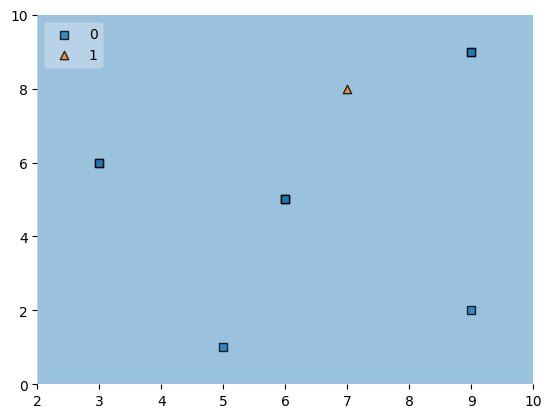

In [48]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [49]:
third_df['y_pred'] = dt3.predict(X) 

In [50]:
third_df

,X1,X2,label,weights,y_pred
9,9,2,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0


In [51]:
alpha3 = calculate_model_weight(0.5)
alpha3

np.float64(0.0)

In [52]:
alpha1,alpha2,alpha3

(np.float64(0.42364893019360184),
 np.float64(1.0986122886681098),
 np.float64(0.0))

In [53]:
#Prediction

In [54]:
query = np.array([1,5]).reshape(1,2)

In [55]:
dt1.predict(query) , dt2.predict(query) ,dt3.predict(query)

(array([1]), array([0]), array([0]))

In [56]:
alpha1*(dt1.predict(query)) + alpha2*(dt2.predict(query)) + alpha3*(dt3.predict(query))

array([0.42364893])

In [57]:
np.sign(alpha1*1 + alpha2*(1) + alpha3*(1))

np.float64(1.0)

In [58]:
query = np.array([6,9]).reshape(1,2)
dt1.predict(query) , dt2.predict(query) ,dt3.predict(query)

(array([1]), array([0]), array([0]))

In [59]:
alpha1*(dt1.predict(query)) + alpha2*(dt2.predict(query)) + alpha3*(dt3.predict(query))

array([0.42364893])

In [60]:
np.sign(alpha1*1 + alpha2*(1) + alpha3*(1))

np.float64(1.0)